# Pulmonary Embolism 

## Libraries

In [1]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Defining Variables

In [2]:
# Given dictionary
data_dict = {
    'characteristic': ['age', 'heart_rate', 'oxygen_saturation', 'temperature'],
    'normal_mean': [58.5, 95.5, 95.8, 37.0],
    'abnormal_mean': [62.2, 105, 94.2, 37.5],
    'normal_range': [16.8, 20.0, 4.2, 1.0],
    'abnormal_range': [15.5, 23.7, 5.6, 1.5]
}

# Set a random seed for reproducibility
np.random.seed(1)

# Define the number of samples
num_samples = 10000

## Data Processing

In [4]:
# Generate synthetic normal data
normal_data = pd.DataFrame()
for char, normal_mean, normal_range in zip(
    data_dict['characteristic'],
    data_dict['normal_mean'],
    data_dict['normal_range']
):
    normal_data[char] = np.random.normal(loc=normal_mean, scale=normal_range/4, size=num_samples)

normal_data['DVT'] = False
normal_data.describe()

,age,heart_rate,oxygen_saturation,temperature
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,58.493374,95.542137,95.784269,37.001090
std,4.219019,5.024677,1.047663,0.247874
min,41.328348,76.340093,91.666672,35.918278
25%,55.661497,92.123702,95.069084,36.833535
50%,58.491059,95.558174,95.787115,36.999802
75%,61.326484,98.968772,96.492212,37.167553
max,73.201076,113.476703,99.776314,37.869837


In [5]:
# Generate synthetic abnormal data
abnormal_data = pd.DataFrame()
for char, abnormal_mean, abnormal_range in zip(
    data_dict['characteristic'],
    data_dict['abnormal_mean'],
    data_dict['abnormal_range']
):
    abnormal_data[char] = np.random.normal(loc=abnormal_mean, scale=abnormal_range/4, size=num_samples)

abnormal_data['DVT'] = True
abnormal_data.describe()

,age,heart_rate,oxygen_saturation,temperature
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,62.225077,105.173676,94.185960,37.500430
std,3.852076,5.873258,1.397088,0.375504
min,47.966831,83.285626,89.023507,36.054711
25%,59.665788,101.216155,93.253833,37.247160
50%,62.246577,105.132448,94.180465,37.502267
75%,64.759794,109.136142,95.125161,37.754970
max,77.691177,129.029064,98.948765,38.981757


In [6]:
# Combine normal and abnormal data
data_df = pd.concat([normal_data, abnormal_data])

# Round all values to one decimal place
data_df = data_df.round(1)

data_df.sample(5)

,age,heart_rate,oxygen_saturation,temperature,DVT
6317,65.8,110.6,94.8,37.0,True
7115,58.3,92.3,98.6,36.7,False
4830,65.2,108.9,93.7,38.0,True
4122,60.5,82.9,95.8,37.3,False
1881,66.1,109.9,94.1,37.5,True


In [7]:
# Split the data into training and testing sets
X = data_df.drop('DVT', axis=1)
y = data_df['DVT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building Models

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Build and train the classification model with KNN
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Make predictions
knn_y_pred = knn_clf.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred)

print(f'KNN Accuracy: {knn_accuracy:.2f}')
print('KNN Classification Report:\n', knn_report)


KNN Accuracy: 0.90
KNN Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.92      0.91      2019
        True       0.91      0.89      0.90      1981

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



In [8]:
from sklearn.ensemble import RandomForestClassifier

# Build and train the classification model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
rf_y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, rf_y_pred)
report = classification_report(y_test, rf_y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.92      0.92      2019
        True       0.92      0.92      0.92      1981

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000



In [9]:
from sklearn.svm import SVC

# Build and train the classification model with SVM
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm_clf.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)

print(f'SVM Accuracy: {svm_accuracy:.2f}')
print('SVM Classification Report:\n', svm_report)


SVM Accuracy: 0.91
SVM Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.92      0.91      2019
        True       0.92      0.89      0.90      1981

    accuracy                           0.91      4000
   macro avg       0.91      0.90      0.90      4000
weighted avg       0.91      0.91      0.90      4000



In [10]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined

# Build the ANN model with a different architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),  # Optional dropout layer for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
ann_y_pred_prob = model.predict(X_test)
ann_y_pred = (ann_y_pred_prob > 0.5).astype(int)

# Evaluate the model
ann_accuracy = accuracy_score(y_test, ann_y_pred)
ann_report = classification_report(y_test, ann_y_pred)

print(f'ANN Accuracy: {ann_accuracy:.2f}')
print('ANN Classification Report:\n', ann_report)





Epoch 1/10


400/400 [==============================] - 4s 3ms/step - loss: 0.8028 - accuracy: 0.7191 - val_loss: 0.4316 - val_accuracy: 0.8219
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3993 - accuracy: 0.8246 - val_loss: 0.3308 - val_accuracy: 0.8566
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3678 - accuracy: 0.8396 - val_loss: 0.3301 - val_accuracy: 0.8531
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3654 - accuracy: 0.8401 - val_loss: 0.3306 - val_accuracy: 0.8606
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3500 - accuracy: 0.8484 - val_loss: 0.3202 - val_accuracy: 0.8625
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.8531 - val_loss: 0.3203 - val_accuracy: 0.8634
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3464 - accuracy: 0.8509 - val_loss: 0.3168 - val_accuracy: 0.8631
E

## Performance

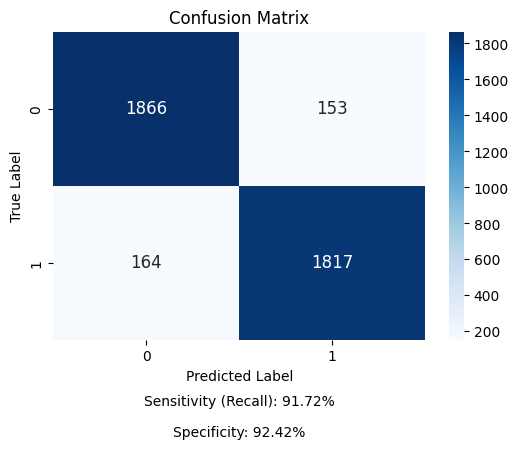

In [11]:
# Create a confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)

# Calculate sensitivity and specificity
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0]) * 100
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) * 100

# Plot the confusion matrix with sensitivity and specificity
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text at the bottom
plt.text(0.5, -0.2, f'Sensitivity (Recall): {sensitivity:.2f}%', ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.3, f'Specificity: {specificity:.2f}%', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()


## Saving The Model

In [12]:
# Save the model to a file
joblib.dump(clf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [8]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load your data (replace this with your actual data loading code)
# X_train, X_test, y_train, y_test = ...

# Create TensorFlow Datasets
train_data = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
test_data = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

# Batch the datasets
batch_size = 1000  # You can adjust this based on your dataset size and available memory
train_data = train_data.batch(batch_size)
test_data = test_data.batch(batch_size)

# Define the Random Forest model
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)

# Train the model
model.fit(train_data)

# Evaluate the model
y_pred_prob = model.predict(test_data)
y_pred = tf.argmax(y_pred_prob, axis=1).numpy()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

model.save("project/model")


NotFoundError: C:\Users\Moccisor\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_decision_forests\tensorflow\ops\inference\inference.so not found

In [9]:
# prompt: tensorflowlite

import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model("project/model")

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.allow_custom_ops = True
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open("project/model.tflite", "wb") as f:
  f.write(tflite_model)

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


NotFoundError: C:\Users\Moccisor\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_decision_forests\tensorflow\ops\inference\inference.so not found